## Prediction Using Supervised ML: Simple Linear Regression

**Sweta Shrestha**

## Imports

First of all, let's import all the important libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

We will work with hypothetical data to predict the percentage of a student based on the number of study hours. This data has two columns: Hours and Scores

In [8]:
#importing data set
data = pd.read_csv("http://bit.ly/w-data ")

## Checking out the data

In [11]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

## Exploratory Data analysis

In [28]:
#Changing the background of the plot
plt.style.use('classic')

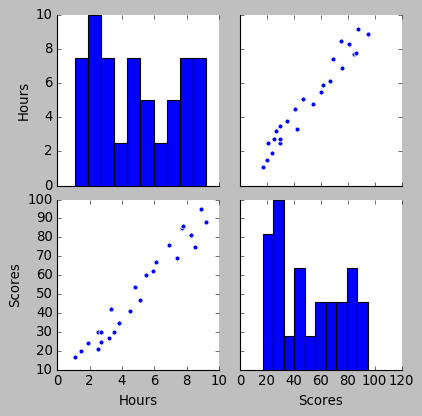

In [29]:
sns.pairplot(data)

In [23]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


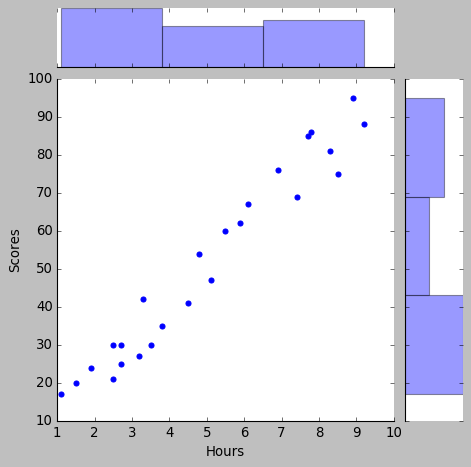

In [30]:
# More number of hours studied, more percentage of a student.
sns.jointplot(x='Hours',y='Scores',data=data)

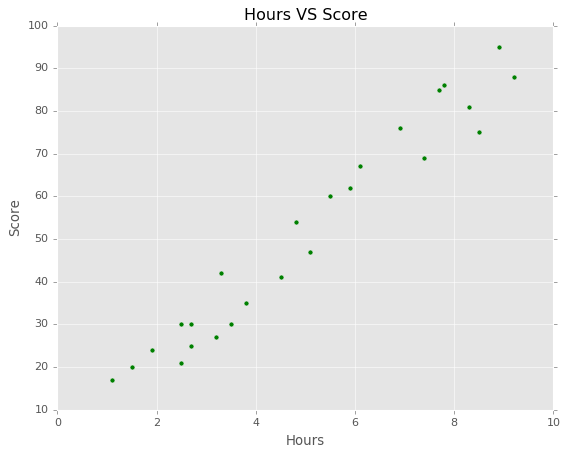

In [33]:
#scatter plot to visualise our points
data.plot(kind='scatter',x='Hours', y='Scores',color='green' )  
plt.title('Hours VS Score')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.style.use('ggplot')
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [51]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Using the model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [36]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Training the Model

Now its time to train our model on our training data!

In [46]:
from sklearn.linear_model import LinearRegression

Creating an instance of LinearRegression() model named lm.

In [47]:
lm=LinearRegression()

In [53]:
#Training or fitting lm on the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of the model

In [55]:
lm.coef_

array([9.78856669])

## Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [56]:
prediction=lm.predict(X_test)

Scatter plot of the real test values verses the predicted values

Text(0, 0.5, 'Predicted Y')

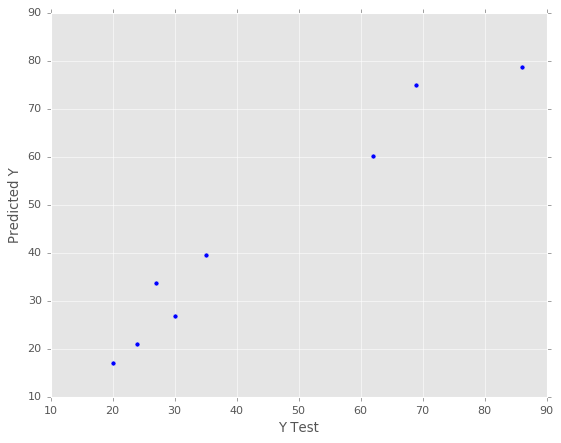

In [57]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Predicted score of student who studies 9.25 hours/day

In [58]:
predicted_score=lm.predict([[9.25]])

In [60]:
print('Predicted Score = {:.2f}'.format(predicted_score[0]))

Predicted Score = 92.92


## Evaluating the Model

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4.419727808027652
MSE: 22.96509721270043
RMSE: 4.792191274636315
